In [ ]:
! [ -e /content ] && pip install -Uqq fastbook nbdev

# Imports
import fastbook
from fastbook import *
from fastai.vision.widgets import *

# Config
fastbook.setup_book()

# Fetch Data

In [ ]:
# Download bear images
# (https://forums.fast.ai/t/download-images-using-duckduckgo-alternative-to-bing-api/94066)

bear_types = 'teddy','grizzly','black'
path = Path('bears')

if not path.exists():
  path.mkdir(exist_ok = True)
  ind = 0
  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} bear', max_images=300)
    for i in results:
      ind +=1
      dest = f"bears/{o}/{o}{ind}.jpg"
      try:
        path1, dirs, files = next(os.walk(f"/content/bears/{o}"))
        if len(files) < 100:
          download_url(i, dest)
        else:
          break
      except:
        continue


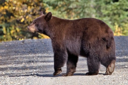

In [9]:
# Show an example of a downloaded image
dest = 'bears/black/black219.jpg'
im = Image.open(dest)
im.to_thumb(128,128)

In [10]:
# Get the path to all image files
fns = get_image_files(path)
fns

(#300) [Path('bears/black/black279.jpg'),Path('bears/black/black271.jpg'),Path('bears/black/black253.jpg'),Path('bears/black/black314.jpg'),Path('bears/black/black216.jpg'),Path('bears/black/black286.jpg'),Path('bears/black/black244.jpg'),Path('bears/black/black231.jpg'),Path('bears/black/black305.jpg'),Path('bears/black/black248.jpg'),Path('bears/black/black234.jpg'),Path('bears/black/black237.jpg'),Path('bears/black/black283.jpg'),Path('bears/black/black261.jpg'),Path('bears/black/black218.jpg'),Path('bears/black/black229.jpg'),Path('bears/black/black289.jpg'),Path('bears/black/black303.jpg'),Path('bears/black/black240.jpg'),Path('bears/black/black295.jpg')...]

In [11]:
# Often when we download files from the internet, there are a few that are corrupt.
failed = verify_images(fns)
failed

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


(#18) [Path('bears/black/black234.jpg'),Path('bears/black/black287.jpg'),Path('bears/black/black296.jpg'),Path('bears/black/black226.jpg'),Path('bears/black/black300.jpg'),Path('bears/black/black250.jpg'),Path('bears/black/black245.jpg'),Path('bears/black/black298.jpg'),Path('bears/black/black264.jpg'),Path('bears/black/black297.jpg'),Path('bears/black/black307.jpg'),Path('bears/teddy/teddy37.jpg'),Path('bears/teddy/teddy72.jpg'),Path('bears/teddy/teddy25.jpg'),Path('bears/grizzly/grizzly205.jpg'),Path('bears/grizzly/grizzly125.jpg'),Path('bears/grizzly/grizzly195.jpg'),Path('bears/grizzly/grizzly118.jpg')]

In [12]:
# Remove the corrupted images
failed.map(Path.unlink);

# Create Data Loader

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


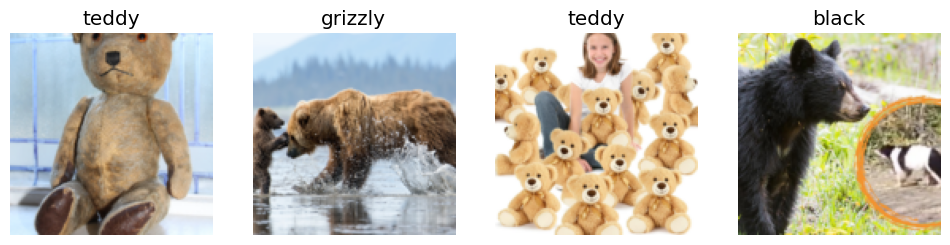

In [13]:
# Define the data block
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

# Create the data loader
dls = bears.dataloaders(path)

# View some of the data
dls.valid.show_batch(max_n=4, nrows=1)

# Data Augmentation Methods

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


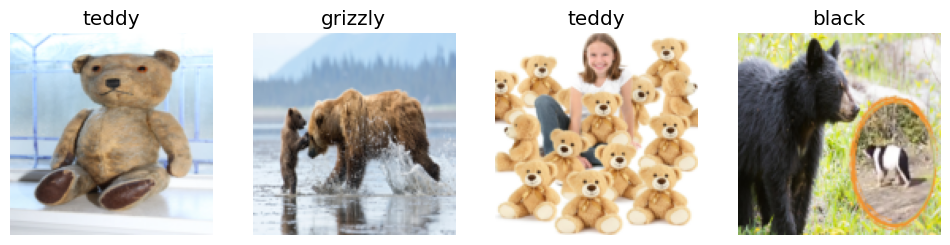

In [14]:
# Stretch the images so they are the same size
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

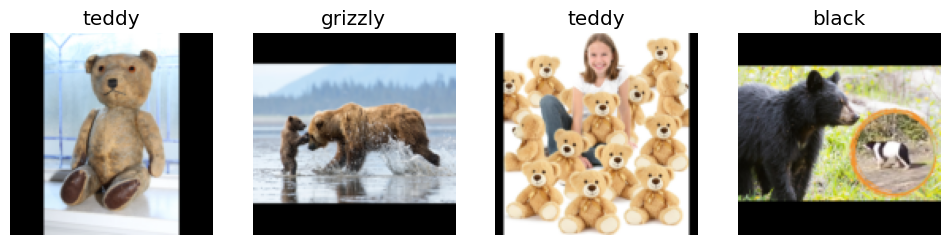

In [15]:
# Pad the images so they are the same size
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

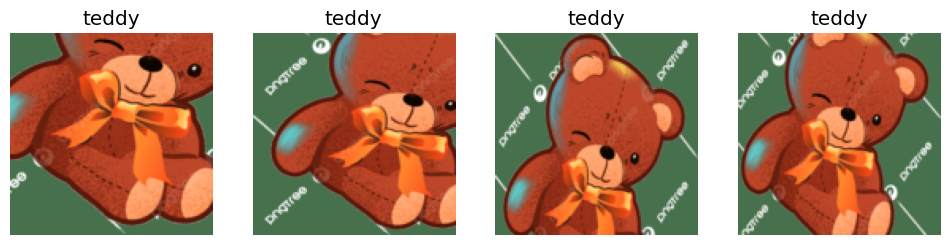

In [16]:
# Perform random crops on the images so they are same size
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


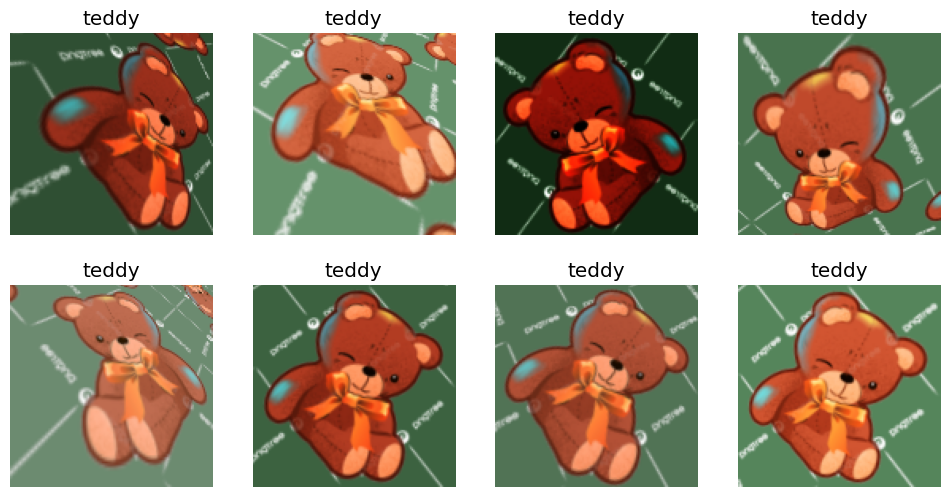

In [17]:
# Use random transforms on the images once they are same size
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

# Data Cleaning
We can clean our data by training our model.

In [32]:
# Create a data block that has random resized cropping
# and also has random transforms
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

# Create a data loader for this data block
dls = bears.dataloaders(path)

# Create a learner based off this data and a pre-trained model
learn = vision_learner(dls, resnet18, metrics=error_rate)

# Fine-tune the pre-trained model
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.817808,0.692082,0.226415,00:11


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.901727,0.367065,0.150943,00:11
1,0.652358,0.298009,0.132075,00:11
2,0.508290,0.313686,0.132075,00:10
3,0.414825,0.311496,0.113208,00:11


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


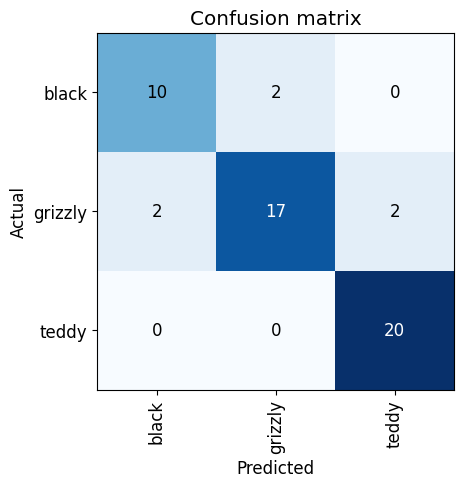

In [33]:
# Let's see what mistakes the model made…
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

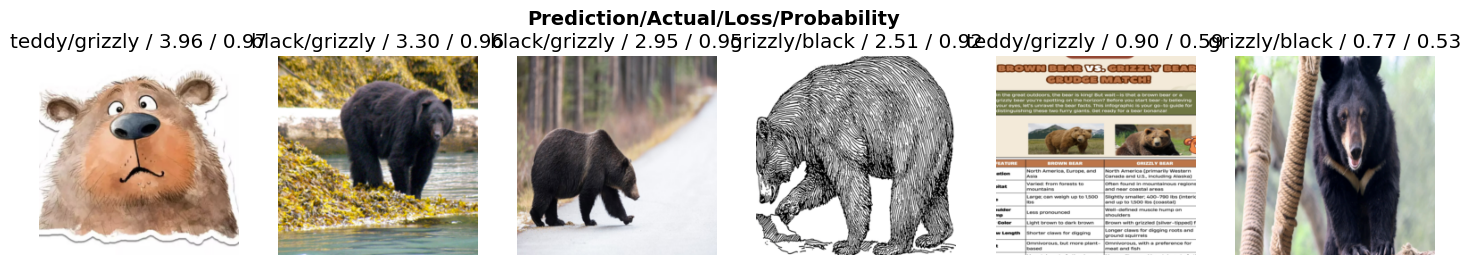

In [34]:
# There appear to be 6 errors.
# Let's view the 6 highest losses…
interp.plot_top_losses(6, nrows=1)

In [ ]:
# fastai Includes a GUI for data cleaning.
# We can use it to select which images we want to keep.
cleaner = ImageClassifierCleaner(learn)
cleaner

In [36]:
# Delete images marked for deletion
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [37]:
# Recategorize images marked with wrong category
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

epoch,train_loss,valid_loss,error_rate,time
0,1.982655,0.815577,0.307692,00:17


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.982138,0.490476,0.192308,00:11
1,0.731656,0.356794,0.115385,00:11
2,0.543503,0.334254,0.096154,00:11
3,0.432264,0.322378,0.096154,00:11


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


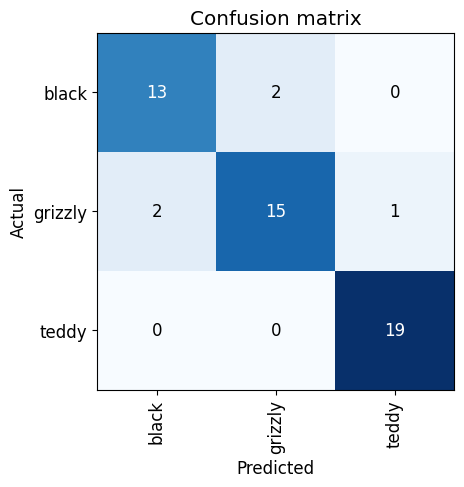

In [38]:
# Now, after data cleaning, let's train again and see the confusion matrix:

# Create a data loader for this data block
dls = bears.dataloaders(path)

# Create a learner based off this data and a pre-trained model
learn = vision_learner(dls, resnet18, metrics=error_rate)

# Fine-tune the pre-trained model
learn.fine_tune(4)

# Compute and show the confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

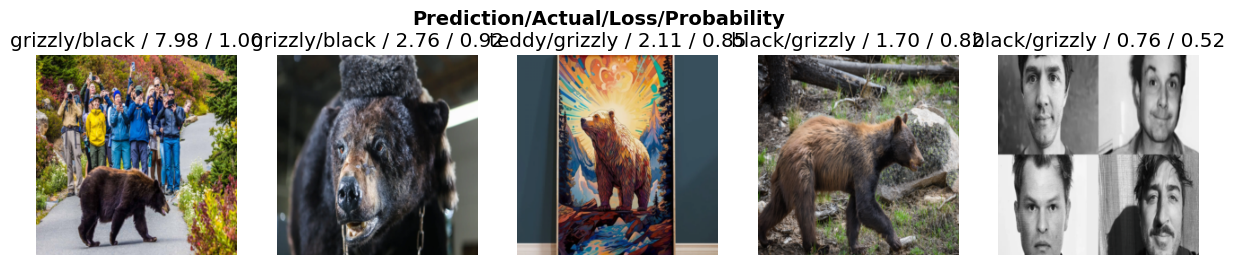

In [39]:
# There appear to be 5 errors now.
# Let's view the 5 highest losses…
interp.plot_top_losses(5, nrows=1)

# Export the Model

In [40]:
# Save the trained model in a "export.pkl" file:
learn.export()

# And, confirm the file exists:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

# Questionnaire

1. Provide an example of where the bear classification model might work poorly in production, due to structural or style differences in the training data.
- A good example is our model may have been trained on zero images of bears at night. And, in production we see a bear at night.

2. Where do text models currently have a major deficiency?
- They may produce factually incorrect information.

3. What are possible negative societal implications of text generation models?
- They can be used to spread disinformation.

4. In situations where a model might make mistakes, and those mistakes could be harmful, what is a good alternative to automating a process?
- Predictions should be evaluated by human experts.

5. What kind of tabular data is deep learning particularly good at?
- Tabular data that involves natural language. Such as movie reviews.

6. What's a key downside of directly using a deep learning model for recommendation systems?
- They may not expand your product horizons by only showing you products you already know about.

7. What are the steps of the Drivetrain Approach?
- Define Objective
- Levers
- Data
- Models

8. How do the steps of the Drivetrain Approach map to a recommendation system?
- The objective is to increase sales, the levers you can pull are changing the ranking of reccomendations, you need to know purchase data for this, and then you can train a model.


9. Create an image recognition model using data you curate, and deploy it on the web.
- https://30403eec451025b20f.gradio.live/

10. What is `DataLoaders`?
- A class that passes data to fastai models.

11. What four things do we need to tell fastai to create `DataLoaders`?
- The kind of data
- how to get the list of items
- how to label the items
- how to create thje validation set

12. What does the `splitter` parameter to `DataBlock` do?
- Tells the datablock how to split up the data into training and validation.

13. How do we ensure a random split always gives the same validation set?
- Can pass it a seed

14. What letters are often used to signify the independent and dependent variables?
- x = independant
- y = dependant

15. What's the difference between the crop, pad, and squish resize approaches? When might you choose one over the others?
- crop will crop the image to a size, cutting off parts of it
- pad will add black padding to the image
- squish will stretch and compress the image
- depending on the kind of data you are using changes what resize method you need.

16. What is data augmentation? Why is it needed?
- It will apply transforms to the data to help the model the generalize more.

17. What is the difference between `item_tfms` and `batch_tfms`?
- `item_tfms` Applies the transforms to a single data sample on the CPU.
- `batch_tfms` Applies the transofrms to batched data samples on the GPU.

18. What is a confusion matrix?
- Shows the prediction accuracy of the model.

19. What does `export` save?
- A pkl file containing the architecture, the train parameters, and the defined data loaders.

20. What is it called when we use a model for getting predictions, instead of training?
- Inference

21. What are IPython widgets?
- Inline GUI for a python notebook

22. When might you want to use CPU for deployment? When might GPU be better?
- Inference is cheaper on a CPU. If you are doing a TON of it, then you might need a GPU.

23. What are the downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC?
- The app will require network connectoin.

24. What are three examples of problems that could occur when rolling out a bear warning system in practice?
- Handling night images
- Handling low resolution images
- Model performance

25. What is "out-of-domain data"?
- Data that is far out of line with the models training data.

26. What is "domain shift"?
- input data in production that changes over time.

27. What are the three steps in the deployment process?
- Manual process
- Limited scope deployment
- Gradual expansion